### Gobal Krishnan V [Click me !!!](https://engineer-ece.github.io/Home)
created date = 03-01-2021

# Linear Regression

In [17]:
#Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-01-03 12:20:04--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-01-03 12:20:04 (49.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [38]:
!ls

moore.csv  sample_data


In [40]:
import pandas as pd
data =pd.read_csv('moore.csv',header=None).values
X = data[:,0].reshape(-1,1)  # make it a 2-D array of size NxD where D = 1
Y = data[:,1]


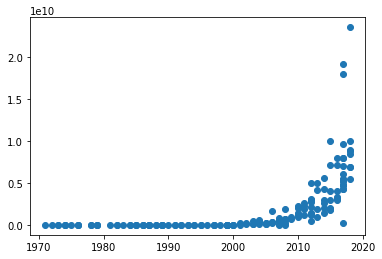

In [41]:
#Plot the data -it is exponetial!
plt.scatter(X,Y)

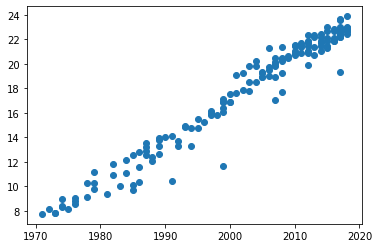

In [42]:
# Linear model, take log
Y = np.log(Y)
plt.scatter(X,Y)


In [43]:
#Center the X date so the are not too large
#We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [46]:
# Now create our Tensorflow model
import tensorflow as tf

model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(1,)),
      tf.keras.layers.Dense(1)
      ])

model.compile(optimizer = tf.keras.optimizers.SGD(0.001,0.9), loss = 'mse')

# learning rate schedular
def schedule(epoch,lr):
    if epoch >=50:
       return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X,Y, epochs = 200, callbacks = [scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 316.0864
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 296.9833
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 323.8590
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 309.5085
Epoch 5/200
6/6 [==============================] - 0s 1ms/step - loss: 179.4817
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 124.1207
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 133.9588
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 91.8886
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 59.9534
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 37.8858
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 33.6155
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 22.1286
Epoch 13/200
6/6 [========================

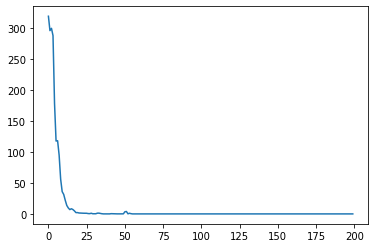

In [47]:
# Plot the loss
plt.plot(r.history['loss'],label='loss')


In [49]:
#Get the slope of the line
#The slope of the line is related to the doubling rate of transistor count
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.34477717]], dtype=float32), array([17.769077], dtype=float32)]


In [50]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

## C = A<sub>0</sub>r<sup>t</sup> = Exponential

Where <b>C</b> is transistor the count and <b>t</b> is the year.

**r** is the rate of growth.
<br>
Example: 
<br> when **t** goes from 1 to 2, **C** increases by a factor of **r**.
<br> when **t** goes from 2 to 3, **C** increases by a factor of r again.
<br>When we take log of the both sides, we get


## log(C) = log(r) * t + log (A<sub>0</sub>) -----> eq(1)

where,
 ##  y = ax + b   ------> eq(2) 
   
 ### Equate both 1 and 2 Equation :
  #### y = log(C)
  #### a = log(r)
  #### x = t
  #### b = log(A<sub>0</sub>)
  We are interested in **r**, because that's the rate of growth. Given out regression weights, we know that:
<br>
  **a = 0.34188038**
<br>**r = e<sup>0.34188038</sup> = 1.4076**
<br>To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for C to increase to 2C.
<br>Let's call the original starting time **t**, to correspond with the initial transistor count C.
<br>Let's call the end time t', to correspond with the final transistor count **2C**.
<br>
<br>The we also have:
### 2C = A<sub>0</sub>r<sup>t</sup>
<br> We get (by dividing the 2 equation):
### 2C/C = (A<sub>0</sub>r<sup>t</sup>)/A<sub>0</sub>r<sup>t</sup>
<br> Simply:
### 2 = r<sup>(t'-t)</sup>
<br> solve for t'-t:
 ## t'-t = log(2)/log(r)  
 ## t'-t = log(2)/a

In [53]:
# moore law
print("Time to double :", np.log(2) / a)

Time to double : 2.0286295205239204


In [54]:
# If you know the analytical solution

X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) /denominator 
print(a, b)
print("Time to double",np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double 2.0286295205239204


# Part 2: Making Predictions


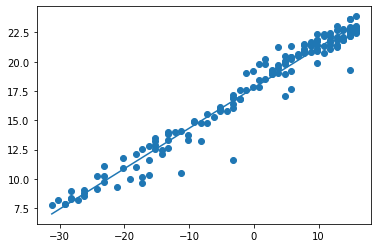

In [55]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [56]:
#Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1,1)

# (N x 1) x (1 x 1) + (1) --> (Nx1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat,Yhat2)

True